In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

credit=pd.read_csv('C:\\Users\\Gaya\\Desktop\\AUA\\R STUDIO\\Projects\\Credit.csv',sep=',')

In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
age         700 non-null int64
ed          700 non-null object
employ      700 non-null int64
address     700 non-null int64
income      700 non-null int64
debtinc     700 non-null float64
creddebt    700 non-null float64
othdebt     700 non-null float64
default     700 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 49.3+ KB


In [5]:
print('Dataset Length::',len(credit))

Dataset Length:: 700


In [6]:
print('Dataset Length::',credit.shape)

Dataset Length:: (700, 9)


In [7]:
credit.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,college degree,17,12,176,9.3,11.359392,5.008608,Yes
1,27,no high school,10,6,31,17.3,1.362202,4.000798,No
2,40,no high school,15,14,55,5.5,0.856075,2.168925,No
3,41,no high school,15,14,120,2.9,2.658720,0.821280,No
4,24,high school,2,0,28,17.3,1.787436,3.056564,Yes


In [9]:
credit['default'].value_counts()

No     517
Yes    183
Name: default, dtype: int64

## Again imbalanced dataset. not good for yes prediction!!!

#### Splitting dataset into training and testing sets

In [36]:
credit.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [39]:
X=credit[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt']]

In [40]:
Y=credit['default']

In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=43)

In [75]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

In [76]:
mod1=DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=4,min_samples_leaf=10)

In [77]:
mod1.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [78]:
Y_pred=mod1.predict(X_test)

In [82]:
Y_pred

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No'

In [84]:
accuracy_score(Y_test,Y_pred)

0.7523809523809524

In [88]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\release\\bin\\'
feature_names=list(X_train.columns)

In [89]:
feature_names

['age',
 'employ',
 'address',
 'income',
 'debtinc',
 'creddebt',
 'othdebt',
 'ed_college degree',
 'ed_high school',
 'ed_no high school',
 'ed_postgraduate',
 'ed_undergraduate']

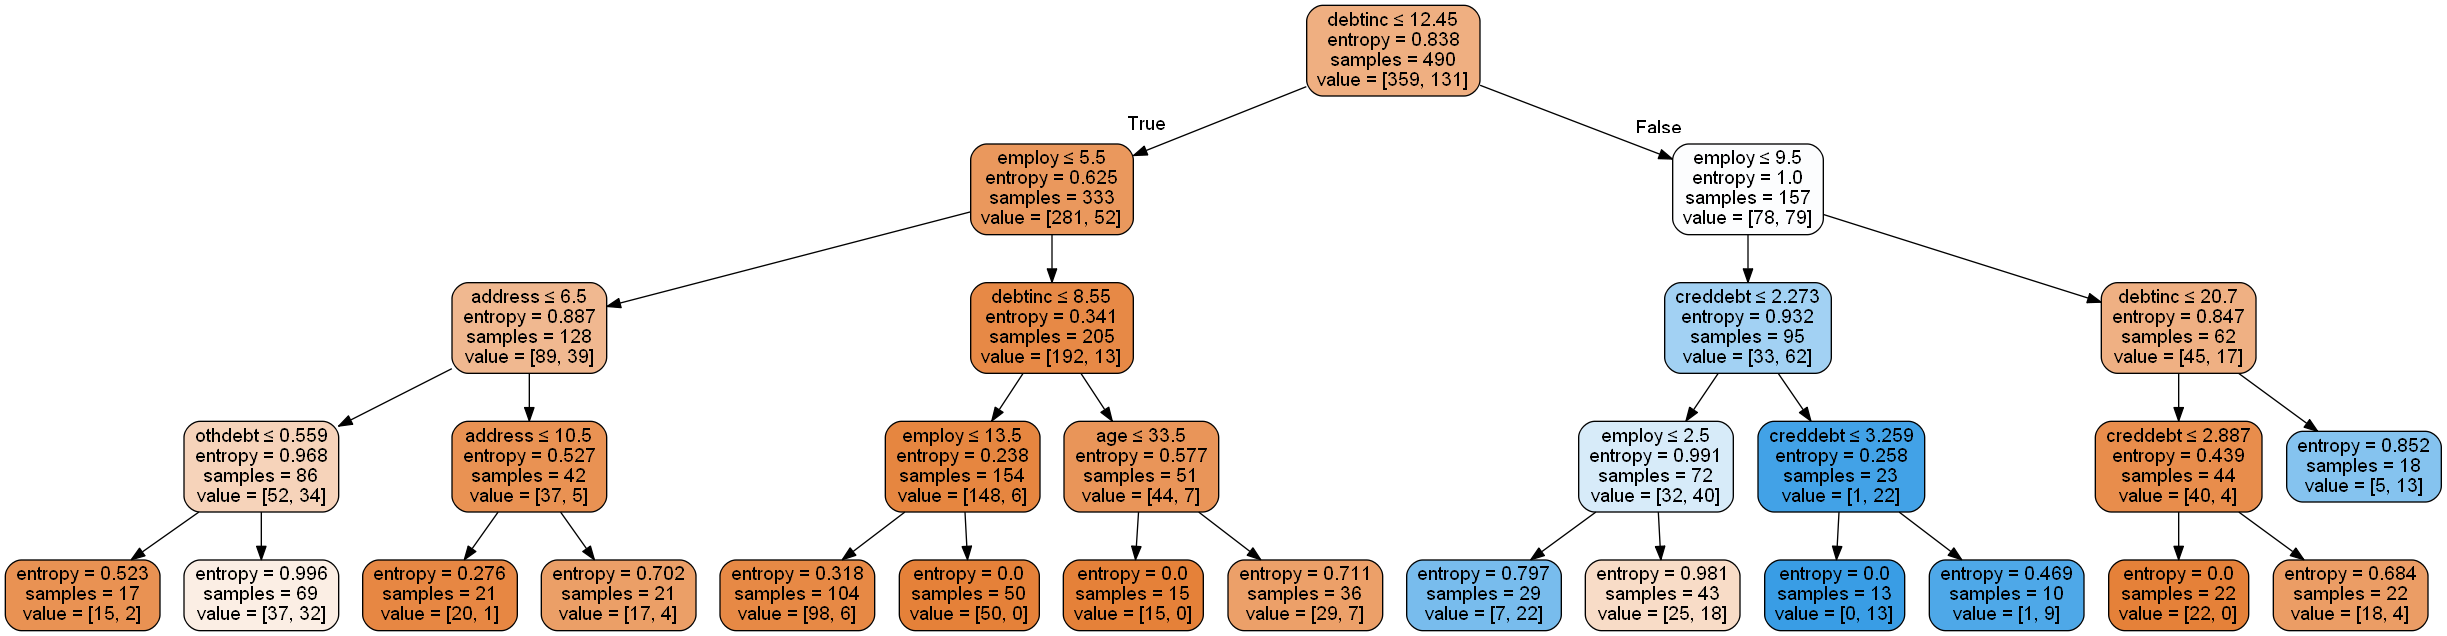

In [90]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(mod1, out_file=dot_data,
                feature_names=feature_names,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())